In [1]:
import pandas as pd
#!pip3 install --upgrade pandas
import datetime

# print non truncated column info in pandas dataframe
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 500)

In [2]:
# read the events (views, addtocart & transaction)
df_events = pd.read_csv('data/events.csv')

In [3]:
df_events.event.unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [4]:
# create a column with the real timestamp
df_events['timestamp_real'] = df_events['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x//1000.0))

In [5]:
# create a column with the yearly number of the day
df_events['day_yearly'] = df_events['timestamp_real'].apply(lambda x: x.isocalendar()[1]*x.isocalendar()[2])

In [6]:
# sort by date
df_events = df_events.sort_values(by=['day_yearly', 'timestamp_real'],ascending=True)

In [7]:
df_events[1000:1010]

,timestamp,visitorid,event,itemid,transactionid,timestamp_real,day_yearly
1478951,1430690185415,897920,addtocart,466335,NaN,2015-05-04 00:56:25,19
1474762,1430690187380,99806,view,211546,NaN,2015-05-04 00:56:27,19
1479064,1430690189359,128125,view,331159,NaN,2015-05-04 00:56:29,19
1473127,1430690190218,45484,view,433141,NaN,2015-05-04 00:56:30,19
1474833,1430690190691,1210411,view,312887,NaN,2015-05-04 00:56:30,19
1468122,1430690194929,655163,view,385878,NaN,2015-05-04 00:56:34,19
1467880,1430690197748,585796,view,235880,NaN,2015-05-04 00:56:37,19
1474873,1430690198543,462034,view,36127,NaN,2015-05-04 00:56:38,19
1478882,1430690201161,365524,view,167484,NaN,2015-05-04 00:56:41,19
1482485,1430690201098,365524,view,167484,NaN,2015-05-04 00:56:41,19


In [8]:
# group all products that each visitor viewed per day
df_sessions = df_events.groupby(['visitorid', 'day_yearly'],as_index=False)['itemid','timestamp_real','event'].agg(lambda x: list(x))

In [15]:
df_sessions.shape

(1650654, 9)

In [9]:
# create a column with the number of views for each visitor id per day
df_sessions['N_views'] = df_sessions['itemid'].apply(lambda x: len(set(x)))

In [10]:
# create a column with 1 if 'addtocart' is in events
df_sessions['has_addtocart'] = df_sessions['event'].apply(lambda x: 1 if 'addtocart' in x else 0)

In [11]:
# create a column with 1 if 'buy' is in events
df_sessions['has_buy'] = df_sessions['event'].apply(lambda x: 1 if 'transaction' in x else 0)

In [12]:
df_sessions.head(3)

,visitorid,day_yearly,itemid,timestamp_real,event,N_views,has_addtocart,has_buy
0,0,185,"[285930, 357564, 67045]","[2015-09-11 23:49:49, 2015-09-11 23:52:39, 2015-09-11 23:55:17]","[view, view, view]",3,0,0
1,1,132,[72028],[2015-08-13 20:46:06],[view],1,0,0
2,2,160,"[325215, 325215, 259884, 216305, 342816, 342816, 216305, 325215]","[2015-08-07 20:51:44, 2015-08-07 20:53:33, 2015-08-07 20:56:52, 2015-08-07 21:01:08, 2015-08-07 21:08:25, 2015-08-07 21:17:24, 2015-08-07 21:17:43, 2015-08-07 21:20:57]","[view, view, view, view, view, view, view, view]",4,0,0


In [13]:
df_sessions['N_views2'] = df_sessions['N_views'].apply(lambda x: '11+' if x>10 else x)

In [14]:
# group sessions by number of views
df_sessions_groups = df_sessions.groupby(['N_views2'], as_index=False).agg({'visitorid':'count', 'has_addtocart':'sum', 'has_buy':'sum'})
# the percentage of cases for each nummber of views
df_sessions_groups['cases(%)'] = df_sessions_groups.apply(lambda x: str(round(100*(x['visitorid']/len(df_sessions)),2))+' %', axis=1)
# the percentage of cases that have 'addtocart'
df_sessions_groups['has_addtocart(%)'] = df_sessions_groups.apply(lambda x: str(round(100*(x['has_addtocart']/x['visitorid']),2))+' %', axis=1)
# the percentage of cases that have 'has_buy'
df_sessions_groups['has_buy(%)'] = df_sessions_groups.apply(lambda x: str(round(100*(x['has_buy']/x['visitorid']),2))+' %', axis=1)
# the percentage of cases that have 'has_buy' from those that have 'addtocart'
df_sessions_groups['abandoned_carts(%)'] = df_sessions_groups.apply(lambda x: str(round(100*(x['has_buy']/x['has_addtocart']),2))+' %', axis=1)



df_sessions_groups

,N_views2,visitorid,has_addtocart,has_buy,cases(%),has_addtocart(%),has_buy(%),abandoned_carts(%)
0,1,1384851,20532,6322,83.9 %,1.48 %,0.46 %,30.79 %
1,2,163176,7974,2211,9.89 %,4.89 %,1.35 %,27.73 %
2,3,47737,3859,1147,2.89 %,8.08 %,2.4 %,29.72 %
3,4,20714,2303,683,1.25 %,11.12 %,3.3 %,29.66 %
4,5,10687,1449,481,0.65 %,13.56 %,4.5 %,33.2 %
5,6,6288,1060,387,0.38 %,16.86 %,6.15 %,36.51 %
6,7,4014,749,216,0.24 %,18.66 %,5.38 %,28.84 %
7,8,2799,523,178,0.17 %,18.69 %,6.36 %,34.03 %
8,9,2011,441,136,0.12 %,21.93 %,6.76 %,30.84 %
9,10,1453,343,112,0.09 %,23.61 %,7.71 %,32.65 %


In [15]:
# group sessions by number of views
df_sessions_groups = df_sessions.groupby(['N_views2'], as_index=False).agg({'visitorid':'count', 'has_addtocart':'sum', 'has_buy':'sum'})
# the percentage of cases for each nummber of views
df_sessions_groups['cases(%)'] = df_sessions_groups.apply(lambda x: 100*(x['visitorid']/len(df_sessions)), axis=1)
# the percentage of cases that have 'addtocart'
df_sessions_groups['has_addtocart(%)'] = df_sessions_groups.apply(lambda x: 100*(x['has_addtocart']/x['visitorid']), axis=1)
# the percentage of cases that have 'addtocart'
df_sessions_groups['has_buy(%)'] = df_sessions_groups.apply(lambda x: 100*(x['has_buy']/x['visitorid']), axis=1)

df_sessions_groups

,N_views2,visitorid,has_addtocart,has_buy,cases(%),has_addtocart(%),has_buy(%)
0,1,1384851,20532,6322,83.897110,1.482614,0.456511
1,2,163176,7974,2211,9.885536,4.886748,1.354979
2,3,47737,3859,1147,2.892005,8.083876,2.402748
3,4,20714,2303,683,1.254897,11.118084,3.297287
4,5,10687,1449,481,0.647440,13.558529,4.500795
5,6,6288,1060,387,0.380940,16.857506,6.154580
6,7,4014,749,216,0.243176,18.659691,5.381166
7,8,2799,523,178,0.169569,18.685245,6.359414
8,9,2011,441,136,0.121830,21.929388,6.762805
9,10,1453,343,112,0.088026,23.606332,7.708190


In [16]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

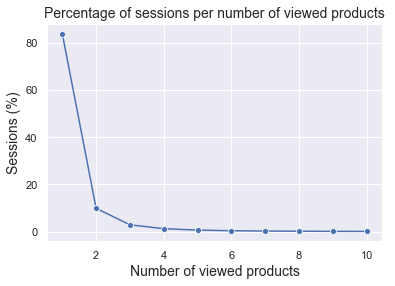

In [17]:
sns.lineplot(x="N_views2", y="cases(%)", marker="o", data=df_sessions_groups[0:10])
plt.xlabel("Number of viewed products", fontsize=14)
plt.ylabel("Sessions (%)", fontsize=14)
plt.title("Percentage of sessions per number of viewed products", fontsize=14)
plt.show()

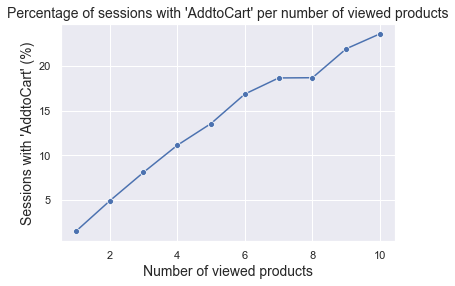

In [18]:
sns.lineplot(x="N_views2", y="has_addtocart(%)", marker="o", data=df_sessions_groups[0:10])
plt.xlabel("Number of viewed products", fontsize=14)
plt.ylabel("Sessions with 'AddtoCart' (%)", fontsize=14)
plt.title("Percentage of sessions with 'AddtoCart' per number of viewed products", fontsize=14)
plt.show()

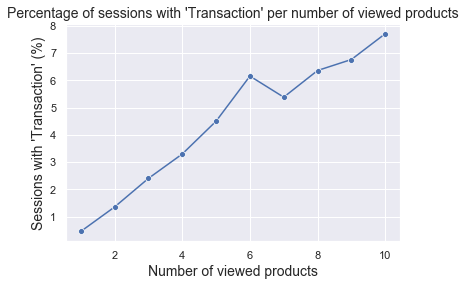

In [19]:
sns.lineplot(x="N_views2", y="has_buy(%)", marker="o", data=df_sessions_groups[0:10])
plt.xlabel("Number of viewed products", fontsize=14)
plt.ylabel("Sessions with 'Transaction' (%)", fontsize=14)
plt.title("Percentage of sessions with 'Transaction' per number of viewed products", fontsize=14)
plt.show()